In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,f1_score
from sklearn.model_selection import KFold
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_to_give.csv')

In [5]:
train_label = train['HasDetections']

# Exploratory Data Analysis

In [6]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,6ca9b92a49d4d23fc4754d464155cbb1,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1516.0,0,7.0,0,NaN,53447.0,...,33778.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,640b82f0a7bd3701818b9442d1432937,win8defender,1.1.15200.1,4.18.1807.18075,1.275.727.0,0,7.0,0,NaN,53447.0,...,33778.0,0,NaN,0.0,0,0,0.0,0.0,15.0,0
2,cf34b73e0b66f6dd249c3b7dff1fb7dd,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1587.0,0,7.0,0,NaN,53447.0,...,7360.0,1,NaN,0.0,1,0,0.0,0.0,10.0,1
3,6b59109284f680df09295d51e72e7abf,win8defender,1.1.15200.1,4.18.1807.18075,1.275.461.0,0,7.0,0,NaN,53447.0,...,19956.0,1,NaN,0.0,0,0,0.0,0.0,11.0,0
4,d1e4f6460d095127de936210ab587e3c,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,0,7.0,0,NaN,53447.0,...,7672.0,0,0.0,0.0,0,0,0.0,0.0,6.0,1


In [7]:
train.shape

(567730, 83)

In [8]:
test.shape

(243313, 82)

In [9]:
test.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,6810c5d22b0973b53a89ef881656e192,win8defender,1.1.14405.2,4.11.15063.1155,1.259.725.0,0,7.0,0,3000.0,7945.0,...,355.0,9321.0,1,NaN,0.0,0,0,0.0,0.0,11.0
1,4d810281c41ae85517e447146ec15b0a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1232.0,0,7.0,0,NaN,7945.0,...,556.0,63654.0,1,0.0,0.0,0,0,0.0,1.0,10.0
2,d0d7e4da90f95d04cdecc0143b690e0a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.922.0,0,7.0,0,NaN,53447.0,...,142.0,9491.0,0,NaN,0.0,0,0,0.0,1.0,3.0
3,718b06bd3089b5a37c63ad6af86ee0cd,win8defender,1.1.15000.2,4.18.1806.18062,1.271.216.0,0,7.0,0,NaN,53447.0,...,142.0,2827.0,1,0.0,0.0,0,0,0.0,0.0,9.0
4,4ab7e3633628cccb65e055d91979c31b,win8defender,1.1.15200.1,4.18.1807.18075,1.275.760.0,0,7.0,0,NaN,53447.0,...,NaN,NaN,0,NaN,0.0,0,0,NaN,0.0,7.0


It seems that our target feature is HasDetections, which is a binary feature, with 0 indicating that malware was not detected, and 1 indicating that malware was detected.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567730 entries, 0 to 567729
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  567730 non-null  object 
 1   ProductName                                        567730 non-null  object 
 2   EngineVersion                                      567730 non-null  object 
 3   AppVersion                                         567730 non-null  object 
 4   AvSigVersion                                       567730 non-null  object 
 5   IsBeta                                             567730 non-null  int64  
 6   RtpStateBitfield                                   565468 non-null  float64
 7   IsSxsPassiveMode                                   567730 non-null  int64  
 8   DefaultBrowsersIdentifier                          29487 non-null   float6

We have data of both numeric and object type. We will handle encodings later.

### Missing Data

In [11]:
pd.set_option('display.max_rows', 83)
print(train.isnull().sum())
pd.set_option('display.max_rows',None)

MachineIdentifier                                         0
ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
RtpStateBitfield                                       2262
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            538243
AVProductStatesIdentifier                              2627
AVProductsInstalled                                    2627
AVProductsEnabled                                      2627
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        20938
OrganizationIdentifier                               174865
GeoNameIdentifier                       

#### Let's get a better look at missing values.

Missing Values in Training data set

In [12]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(45)

,Total,Percent
PuaMode,567632,99.982738
Census_ProcessorClass,565598,99.624469
DefaultBrowsersIdentifier,538243,94.806158
Census_IsFlightingInternal,469985,82.783189
Census_InternalBatteryType,400234,70.497243
Census_ThresholdOptIn,358318,63.114156
Census_IsWIMBootEnabled,357794,63.021859
SmartScreen,207217,36.499216
OrganizationIdentifier,174865,30.800733
SMode,38362,6.757085


Missing Values in Test Data set

In [13]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(45)

,Total,Percent
PuaMode,567632,99.982738
Census_ProcessorClass,565598,99.624469
DefaultBrowsersIdentifier,538243,94.806158
Census_IsFlightingInternal,469985,82.783189
Census_InternalBatteryType,400234,70.497243
Census_ThresholdOptIn,358318,63.114156
Census_IsWIMBootEnabled,357794,63.021859
SmartScreen,207217,36.499216
OrganizationIdentifier,174865,30.800733
SMode,38362,6.757085


#### Removing columns with more than 40% missing data

In [14]:
high_null_columns = [c for c in train.columns if train[c].count() < len(train)*0.6]
train.drop(high_null_columns, axis=1, inplace=True)
print('Columns with more than 40% null values: ', high_null_columns)

Columns with more than 40% null values:  ['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled']


Let's remove from the test dataset also.

In [15]:
test.drop(high_null_columns, axis=1, inplace=True)

In [16]:
#Removing machine ID column
del train['MachineIdentifier']

In [17]:
machine_id = test['MachineIdentifier'].values
del test['MachineIdentifier']

In [18]:
print(train.shape)
print(test.shape)

(567730, 75)
(243313, 74)


#### Target Analysis

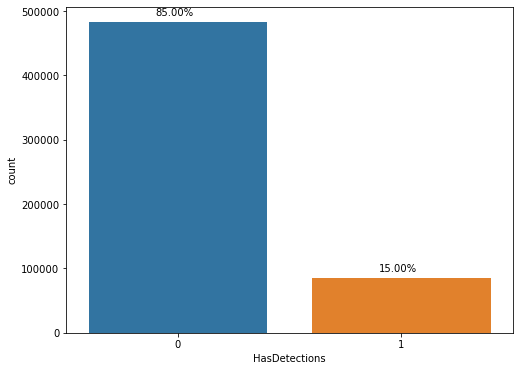

In [19]:
plt.figure(figsize=(8,6))

ax = sns.countplot('HasDetections', data=train)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(train['HasDetections'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

We thus have a class imbalanced probelm at our hand.

### Checking Skewness

In [20]:
pd.options.display.float_format = '{:,.2f}'.format
skewed = pd.DataFrame([{'column': c, 'uniq': train[c].nunique(), 'skewness': train[c].value_counts(normalize=True).values[0] * 100} for c in train.columns])
skewed = skewed.sort_values('skewness', ascending=False)
skewed

,column,uniq,skewness
4,IsBeta,2,100.00
63,Census_IsFlightsDisabled,2,100.00
25,AutoSampleOptIn,2,100.00
60,Census_IsPortableOperatingSystem,2,99.95
26,SMode,2,99.93
32,Census_DeviceFamily,3,99.81
30,UacLuaenable,5,99.40
68,Census_IsVirtualDevice,2,99.02
0,ProductName,6,98.92
10,HasTpm,2,98.77


Let's remove very highly skewed data from the dataset

In [21]:
to_drop = []

In [22]:
to_drop.extend(skewed[skewed.skewness > 99].column.tolist())
to_drop

['IsBeta',
 'Census_IsFlightsDisabled',
 'AutoSampleOptIn',
 'Census_IsPortableOperatingSystem',
 'SMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice']

In [23]:
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)

In [24]:
print(train.shape)
print(test.shape)

(567730, 67)
(243313, 66)


### Feature Selection (Numerical Data)

In [25]:
corr_matrix = train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop

['IsSxsPassiveMode',
 'AVProductsInstalled',
 'Census_ProcessorModelIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSBuildNumber',
 'Census_OSUILocaleIdentifier']

In [26]:
# Dropping those columns from the train set
train = train.drop(train[to_drop], axis=1)
# Dropping those columns from the test set
test = test.drop(test[to_drop], axis=1)

In [27]:
print(train.shape)
print(test.shape)

(567730, 60)
(243313, 59)


### Feature Selection (non-numerical / categorical data)

In [28]:
# Creating a list to store non numerical (categorical) data of object type
objList = train.select_dtypes(include = "object").columns
print (objList)

Index(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_PowerPlatformRoleName', 'Census_OSVersion',
       'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing'],
      dtype='object')


In [29]:
# Printing number of categories in each column
for i in objList:
    print (i,len(train[i].unique()))

ProductName 6
EngineVersion 52
AppVersion 99
AvSigVersion 6849
Platform 4
Processor 3
OsVer 13
OsPlatformSubRelease 9
OsBuildLab 481
SkuEdition 8
SmartScreen 15
Census_MDC2FormFactor 12
Census_PrimaryDiskTypeName 5
Census_ChassisTypeName 38
Census_PowerPlatformRoleName 10
Census_OSVersion 315
Census_OSArchitecture 3
Census_OSBranch 18
Census_OSEdition 26
Census_OSSkuName 21
Census_OSInstallTypeName 9
Census_OSWUAutoUpdateOptionsName 6
Census_GenuineStateName 4
Census_ActivationChannel 6
Census_FlightRing 8


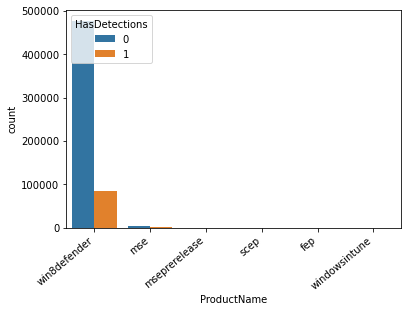

<Figure size 3600x3600 with 0 Axes>

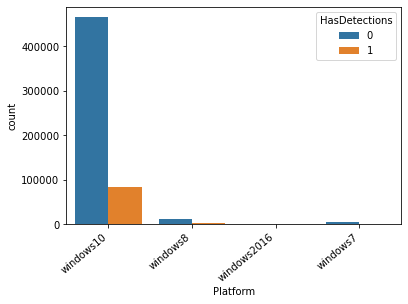

<Figure size 3600x3600 with 0 Axes>

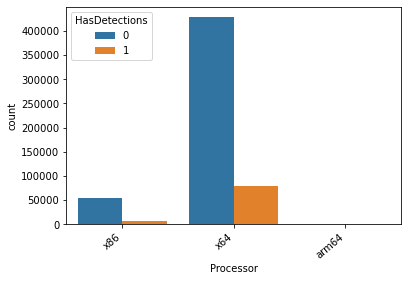

<Figure size 3600x3600 with 0 Axes>

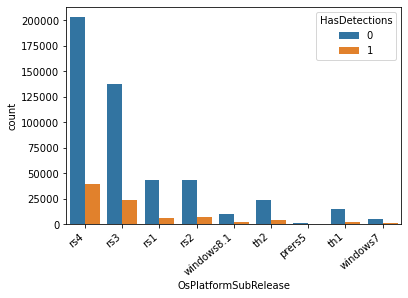

<Figure size 3600x3600 with 0 Axes>

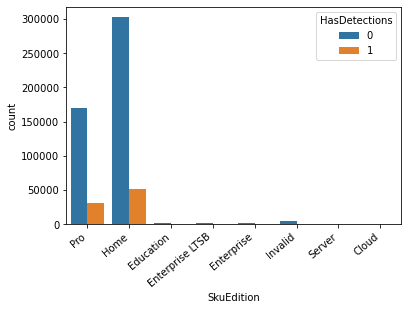

<Figure size 3600x3600 with 0 Axes>

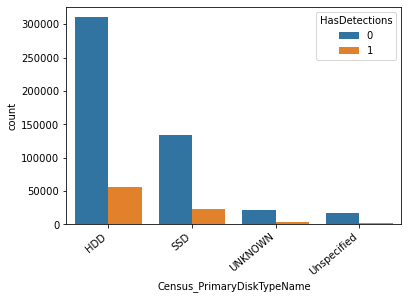

<Figure size 3600x3600 with 0 Axes>

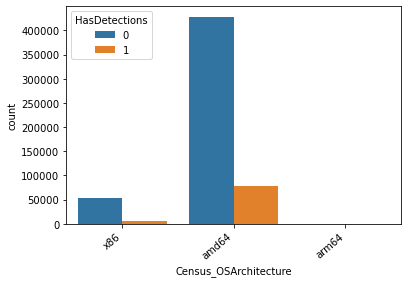

<Figure size 3600x3600 with 0 Axes>

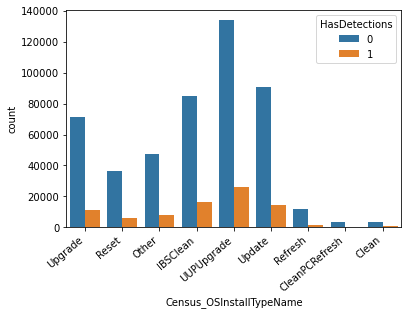

<Figure size 3600x3600 with 0 Axes>

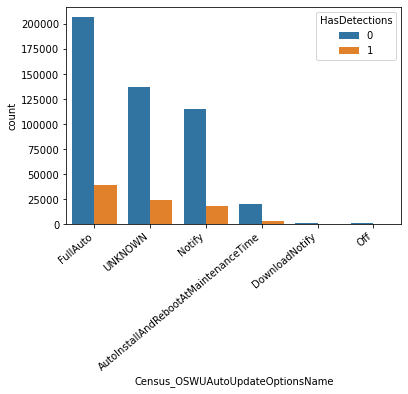

<Figure size 3600x3600 with 0 Axes>

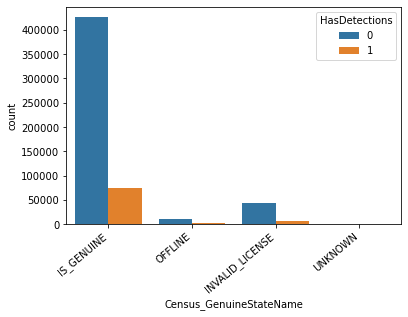

<Figure size 3600x3600 with 0 Axes>

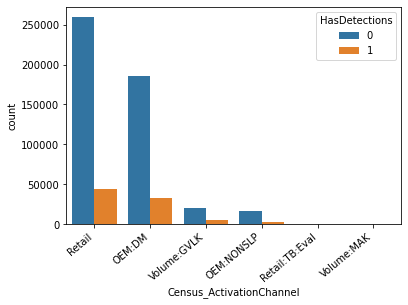

<Figure size 3600x3600 with 0 Axes>

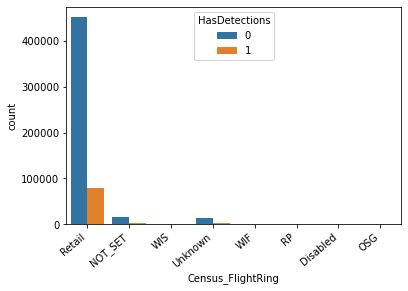

<Figure size 3600x3600 with 0 Axes>

In [30]:
# Visualizing columns having number of categories <= 9 since having large number of categories increases model computation expensive and 
#makes incorrect predictions
for i in objList:
    n = len(train[i].unique())
    if(n<=9):

        ax = sns.countplot(x=i, hue="HasDetections", data=train)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.figure(figsize = (50,50))
        plt.show()    

In [31]:
# Storing useful columns (having no. of categories <= 9) in the list newlist
newlist = []
for i in objList:
    n = len(train[i].unique())
    if(n<=9):
      newlist.append (i)
newlist        

['ProductName',
 'Platform',
 'Processor',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_PrimaryDiskTypeName',
 'Census_OSArchitecture',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [32]:
# Dropping useless columns (having no. of categories > 9) from train and test
for i in objList:
    n = len(train[i].unique())
    if(n>9):
        train=train.drop([i],axis=1)
        test=test.drop([i],axis=1)

In [33]:
print(train.shape)
print(test.shape)

(567730, 47)
(243313, 46)


#### Label Encoding

In [34]:
#Label Encoding for object to numeric conversion in training set
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in newlist:
    train[feat] = le.fit_transform(train[feat].astype(str))
    
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567730 entries, 0 to 567729
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        567730 non-null  int64  
 1   RtpStateBitfield                                   565468 non-null  float64
 2   AVProductStatesIdentifier                          565103 non-null  float64
 3   AVProductsEnabled                                  565103 non-null  float64
 4   HasTpm                                             567730 non-null  int64  
 5   CountryIdentifier                                  567730 non-null  int64  
 6   CityIdentifier                                     546792 non-null  float64
 7   OrganizationIdentifier                             392865 non-null  float64
 8   GeoNameIdentifier                                  567717 non-null  float6

In [35]:
#Label Encoding for object to numeric conversion in test set
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in newlist:
    test[feat] = le.fit_transform(test[feat].astype(str))
    
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243313 entries, 0 to 243312
Data columns (total 46 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        243313 non-null  int64  
 1   RtpStateBitfield                                   242361 non-null  float64
 2   AVProductStatesIdentifier                          242156 non-null  float64
 3   AVProductsEnabled                                  242156 non-null  float64
 4   HasTpm                                             243313 non-null  int64  
 5   CountryIdentifier                                  243313 non-null  int64  
 6   CityIdentifier                                     234367 non-null  float64
 7   OrganizationIdentifier                             168182 non-null  float64
 8   GeoNameIdentifier                                  243306 non-null  float6

#### Impute Missing Data

In [36]:
# Simple Imputing Training and Test Sets
from sklearn.impute import SimpleImputer
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
train = pd.DataFrame(fill_NaN.fit_transform(train),columns = train.columns)
train_Label = pd.DataFrame(train['HasDetections'])
train = train.drop(['HasDetections'],axis=1)
test = pd.DataFrame(fill_NaN.fit_transform(test),columns = train.columns)

In [37]:
train.isnull().sum()

ProductName                                          0
RtpStateBitfield                                     0
AVProductStatesIdentifier                            0
AVProductsEnabled                                    0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsBuild                                              0
OsSuite                                              0
OsPlatformSubRelease                                 0
SkuEdition                                           0
IsProtected                                          0
IeVerIdentifier                                      0
Firewall  

In [38]:
test.isnull().sum()

ProductName                                          0
RtpStateBitfield                                     0
AVProductStatesIdentifier                            0
AVProductsEnabled                                    0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsBuild                                              0
OsSuite                                              0
OsPlatformSubRelease                                 0
SkuEdition                                           0
IsProtected                                          0
IeVerIdentifier                                      0
Firewall  

#### Correlation

Visualizing Correlation of columns with target feature in groups of 10

In [39]:
corr_to_remove = []

In [40]:
train['HasDetections'] = train_label

In [41]:
cols = train.columns.tolist()

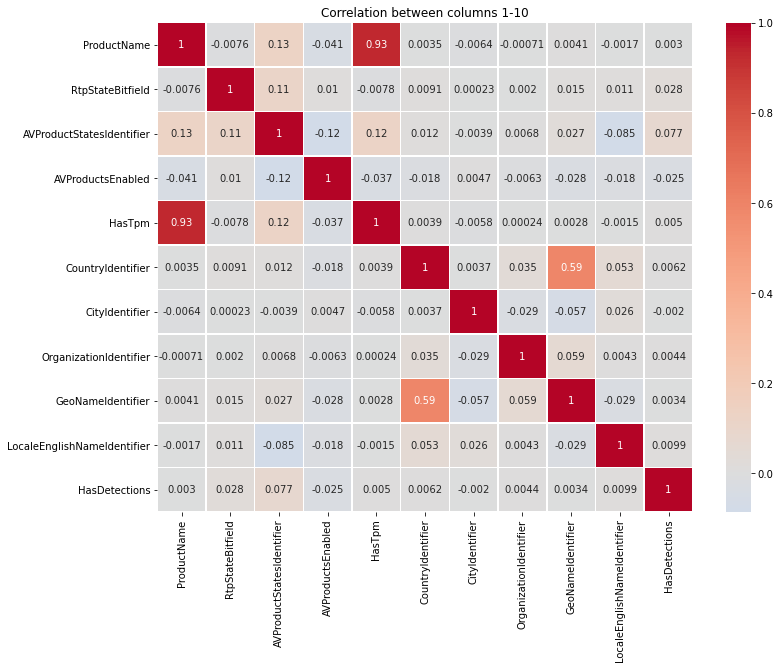

In [42]:
plt.figure(figsize=(12,9))
corr_cols = cols[:10]
corr_cols.append('HasDetections')
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between columns 1-10')
plt.show()

Nothing significant we learn from this heatmap

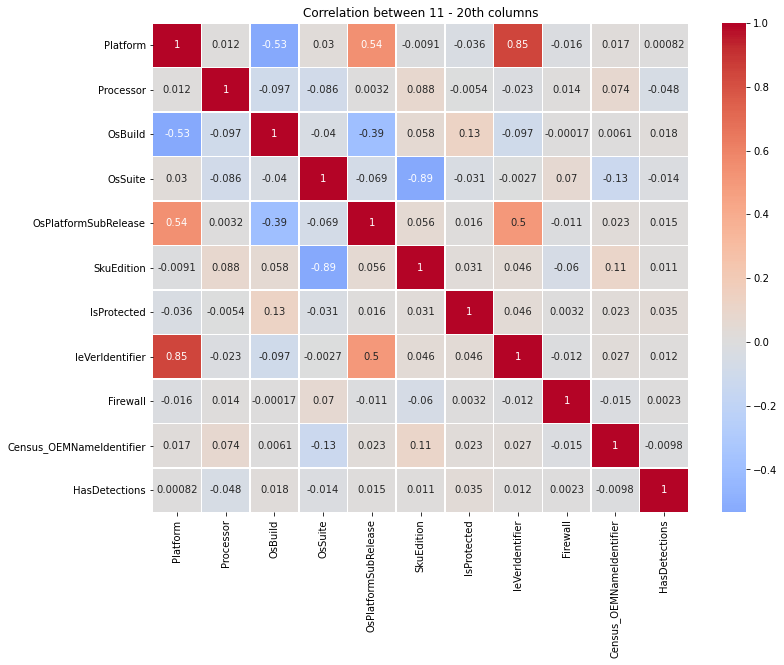

In [43]:
corr_cols = cols[10:20]
corr_cols.append('HasDetections')
plt.figure(figsize=(12,9))
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between 11 - 20th columns')
plt.show()

Platform has high correlation with 3 features. Let's see what values it contain.

In [44]:
print(train.Platform.value_counts())
print(train.Platform.nunique())

0.00    548523
3.00     12138
2.00      6021
1.00      1048
Name: Platform, dtype: int64
4


Most of the values are 0. We can safely drop this feature.

In [45]:
print(train.OsBuild.value_counts())
print(train.OsBuild.nunique())

17,134.00    242003
16,299.00    160988
15,063.00     50761
14,393.00     49165
10,586.00     27614
10,240.00     17545
9,600.00      12138
7,601.00       5985
17,692.00       229
17,738.00       169
17,744.00       156
17,758.00        89
17,751.00        82
17,713.00        81
17,746.00        81
17,754.00        77
17,760.00        59
17,741.00        59
17,755.00        51
17,735.00        51
17,763.00        43
17,733.00        41
7,600.00         36
17,672.00        36
17,686.00        35
17,677.00        22
18,234.00        16
17,666.00        16
17,682.00        15
17,704.00        11
17,730.00         9
18,237.00         9
17,634.00         6
17,723.00         5
18,242.00         5
17,643.00         4
17,747.00         4
17,661.00         4
17,711.00         4
17,728.00         4
17,627.00         3
17,655.00         3
17,650.00         3
17,639.00         2
18,219.00         2
17,761.00         2
17,618.00         1
17,604.00         1
18,204.00         1
17,133.00         1


In [46]:
print(train.OsPlatformSubRelease.value_counts())
print(train.OsPlatformSubRelease.nunique())

4.00    242003
3.00    160988
2.00     50761
1.00     49165
6.00     27614
5.00     17545
8.00     12138
7.00      6021
0.00      1495
Name: OsPlatformSubRelease, dtype: int64
9


In [47]:
print(train.IeVerIdentifier.value_counts())
print(train.IeVerIdentifier.nunique())

137.00    240158
117.00    113531
108.00     30997
111.00     29398
98.00      23418
135.00     14422
74.00      13935
53.00      13319
94.00      11528
105.00     10885
333.00      9464
107.00      8607
103.00      8010
96.00       5886
126.03      3791
76.00       3731
114.00      2562
71.00       2514
323.00      2391
41.00       2189
335.00      1565
334.00      1348
87.00       1223
81.00        824
82.00        779
78.00        775
73.00        694
42.00        588
337.00       574
302.00       520
85.00        512
84.00        411
91.00        389
72.00        359
86.00        351
92.00        346
88.00        336
332.00       304
90.00        275
68.00        270
44.00        225
163.00       188
327.00       178
180.00       163
325.00       161
331.00       159
185.00       150
295.00       143
49.00        135
64.00         97
288.00        96
45.00         94
307.00        92
322.00        89
199.00        86
65.00         84
186.00        82
190.00        80
169.00        

We can delete only Platform feature.

In [48]:
corr_to_remove.append('Platform')

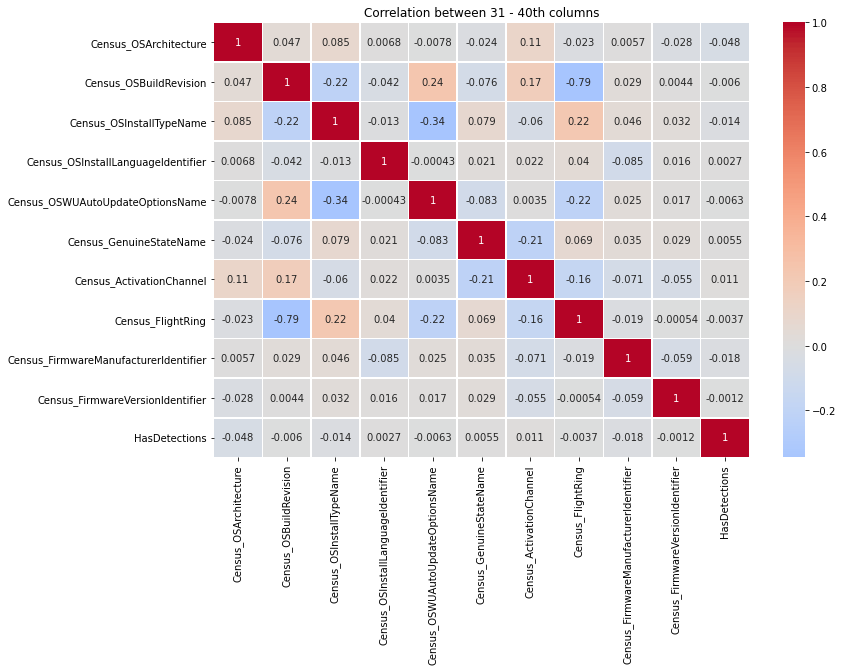

In [49]:
corr_cols = cols[30:40]
corr_cols.append('HasDetections')
plt.figure(figsize=(12,8))
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between 31 - 40th columns')
plt.show()

Nothing useful from this heatmap also.

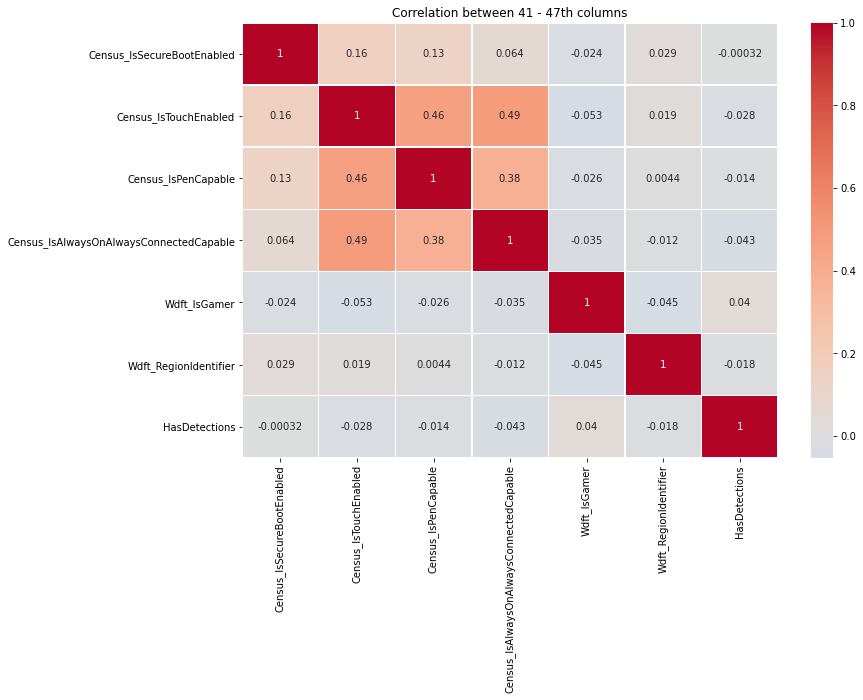

In [50]:
corr_cols = cols[40:46]
corr_cols.append('HasDetections')
plt.figure(figsize=(12,8))
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between 41 - 47th columns')
plt.show()

Let's inspect Census_IsTouchEnabled

In [51]:
print(train.Census_IsTouchEnabled.value_counts())
print(train.Census_IsTouchEnabled.nunique())

0.00    491516
1.00     76214
Name: Census_IsTouchEnabled, dtype: int64
2


This seems like a binary feature. It will be useful in model training.

In [52]:
train.drop(corr_to_remove, axis=1, inplace=True)
test.drop(corr_to_remove, axis=1, inplace=True)

In [53]:
print(train.shape)
print(test.shape)

(567730, 46)
(243313, 45)


In [54]:
train = train.drop(['HasDetections'],axis=1)

## Models

#### Handling Imbalanced Data

In [55]:
# from imblearn.over_sampling import SMOTE
X = train
Y = train_Label
# sm = SMOTE(random_state=2020,n_jobs=-1)     #default - samples not the major class
# X, Y = sm.fit_sample(X, Y.values.ravel(),)

In [56]:
# print ('Shape of oversampled data: {}'.format(X.shape))
# print ('Shape of Y: {}'.format(Y.shape))
# sns.countplot(Y)
# plt.title('Balanced training data')
# plt.show()

### lightGBM model

In [57]:
# params = {'num_leaves': 60,
#           'n_estimators': 2000,
#          'min_data_in_leaf': 100, 
#          'objective':'binary',
#           'is_unbalance': True,
#          'max_depth': -1,
#          'learning_rate': 0.1,
#          'n_jobs': -1,
#          "boosting": "gbdt",
#          "feature_fraction": 0.8,
#          "bagging_freq": 1,
#          "bagging_fraction": 0.8 ,
#          "bagging_seed": 1,
#          "metric": 'auc',
#          "lambda_l1": 0.3,
#          "verbosity": -1}

In [58]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 2020,stratify = Y)

In [59]:
# lg_model = lgb.LGBMClassifier(**params)
# lg_model.fit(x_train, y_train)
# y_pred = lg_model.predict_proba(test)
# submission = pd.DataFrame(columns=['MachineIdentifier', 'HasDetections'])
# submission['MachineIdentifier'] = machine_id
# submission['HasDetections'] = y_pred[:, 1] 
# submission.to_csv('submission_12_lightGBM.csv')

#### XGBoost ( Without Smote)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 2020, stratify = Y)

In [76]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 3000,random_state = 2020, n_jobs=-1,max_depth = 11, scale_pos_weight = 1, learning_rate = 0.03,
                          gamma = 0.2, subsample = 1, colsample_bytree = 0.5, min_child_weight = 1, objective= 'binary:logistic')
classifier.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.03, max_depth=15,
              n_estimators=3000, n_jobs=-1, random_state=2020)

In [77]:
y_pred = classifier.predict_proba(test)

In [78]:
submission = pd.DataFrame(columns=['MachineIdentifier', 'HasDetections'])
submission['MachineIdentifier'] = machine_id
submission['HasDetections'] = y_pred[:, 1] 
submission.to_csv('submission_15_XGB.csv')

#### Grid search for XGBoost

In [115]:
# param_xgb = {
#     'n_estimarots': [3000, 4000],
#     'max_depth': [8,12],
#     'gamma': [2,6,],
#     'min_child_weight': [3,10],
#     'subsample': [0.5, 0.7],
#     'lambda': [0.6,1.5], 
#     'scale_pos_weight': [8, 10]       
#     }

In [ ]:
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = param_xgb,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(x_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

#### Random Forest (With Smote)

In [59]:
# X = train
# Y = train_Label

In [62]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2020, stratify = Y)
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 2000, random_state = 2020, n_jobs=-1,
#                                     max_depth=10, min_samples_split=10, min_samples_leaf=30, class_weight="balanced")
# classifier.fit(x_train, y_train)

In [ ]:
# y_pred = classifier.predict_proba(test)
# submission = pd.DataFrame(columns=['MachineIdentifier', 'HasDetections'])
# submission['MachineIdentifier'] = machine_id
# submission['HasDetections'] = y_pred[:, 1] 
# submission.to_csv('submission_1_rf.csv')

#### Logistic Regression (without smote)

In [67]:
# X = train
# Y = train_Label
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2020, stratify = Y)
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 2020,class_weight="balanced", n_jobs=-1)
# classifier.fit(x_train, y_train)

In [70]:
# y_pred = classifier.predict_proba(test)
# submission = pd.DataFrame(columns=['MachineIdentifier', 'HasDetections'])
# submission['MachineIdentifier'] = machine_id
# submission['HasDetections'] = y_pred[:, 1] 
# submission.to_csv('submission_1_lr_without_smote.csv')

#### Logistic Regression (with smote)

In [73]:
# from imblearn.over_sampling import SMOTE
# X = train
# Y = train_Label
# sm = SMOTE(random_state=2020,n_jobs=-1)     #default - samples not the major class
# X, Y = sm.fit_sample(X, Y.values.ravel(),)

In [79]:
# print ('Shape of oversampled data: {}'.format(X.shape))
# print ('Shape of Y: {}'.format(Y.shape))
# sns.countplot(Y)
# plt.title('Balanced training data')
# plt.show()

In [76]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2020)

In [1]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 2020, n_jobs=-1)
# classifier.fit(x_train, y_train)

In [78]:
# y_pred = classifier.predict_proba(test)
# submission = pd.DataFrame(columns=['MachineIdentifier', 'HasDetections'])
# submission['MachineIdentifier'] = machine_id
# submission['HasDetections'] = y_pred[:, 1] 
# submission.to_csv('submission_2_lr_with_smote.csv')